# Example usage for inverted data

imoporting libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import libaarhusxyz
import libaarhusxyz.normalizer
import os

### load the data

In [3]:
data=libaarhusxyz.XYZ("/home/redhog/Projects/Emerald/cnntest/axelml/AEM/SCI_I01_25L_guro5_inv.xyz")
libaarhusxyz.normalizer.normalize(data)

In [5]:
#data=libaarhusxyz.XYZ("example.xyz")
#libaarhusxyz.normalizer.normalize(data)

Text(0, 0.5, 'northing')

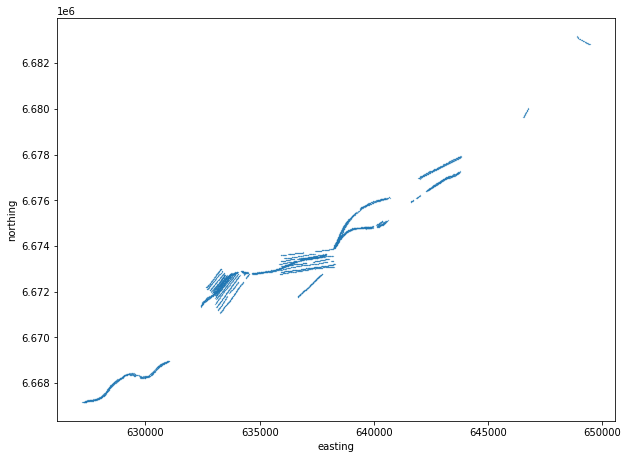

In [6]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(data.flightlines.x, data.flightlines.y, '.',  markersize=0.5)
ax1.set_aspect('equal')
ax1.set_xlabel("easting")
ax1.set_ylabel("northing")

### plot resistivity of one flightline

In [7]:
filt = data.flightlines.title == 700301

res = data.resistivity.join(data.flightlines[["xdist", "topo"]])[filt]
top = data.dep_top[filt]
bot = data.dep_bot[filt]

res = res.melt(["xdist", "topo"], var_name="layer", value_name="res", ignore_index=False)

res["top"] = top.melt(var_name="layer", value_name="top", ignore_index=False).top
res["bot"] = bot.melt(var_name="layer", value_name="bot", ignore_index=False).bot

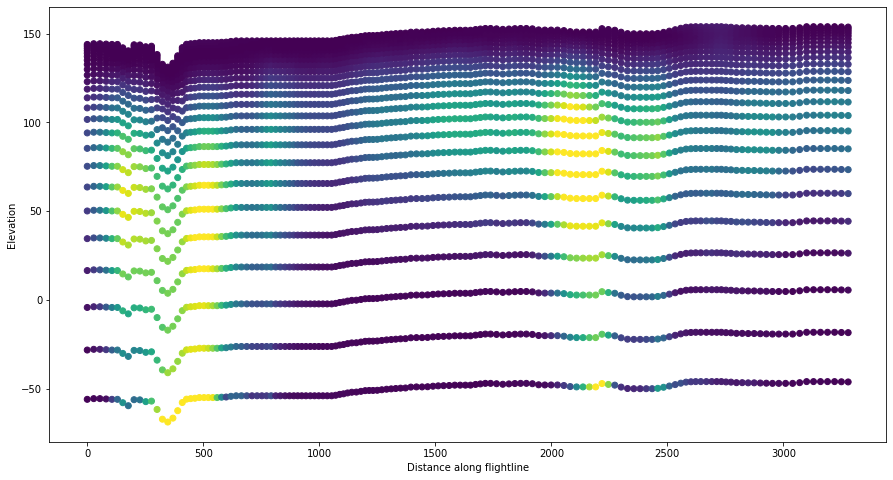

In [8]:
fig1, ax1 = plt.subplots(figsize=(15, 8))
ax1.scatter(res.xdist, res.topo - res.top, c=res.res)
ax1.set_xlabel("Distance along flightline")
ax1.set_ylabel("Elevation")
plt.show()

In [10]:
data.flightlines

,title,x_orig,y_orig,time,fid,record,topo,alt,invalt,invaltstd,...,rho_i_std25,doi_upper,doi_lower,x,y,x_web,y_web,lon,lat,xdist
0,100101,643741.4,6677209.0,41302.598218,1,1,134.1,31.30,30.16,0.0536,...,6.68,30.368,69.387,643741.4,6677209.0,1.290599e+06,8.445809e+06,11.593651,60.206284,0.000000
1,100101,643722.8,6677193.5,41302.598241,2,2,134.0,30.31,26.75,0.0578,...,4.93,35.718,100.968,643722.8,6677193.5,1.290561e+06,8.445779e+06,11.593304,60.206151,24.211774
2,100101,643702.4,6677180.0,41302.598264,3,3,134.0,29.27,21.64,0.0622,...,4.85,45.092,128.015,643702.4,6677180.0,1.290519e+06,8.445753e+06,11.592927,60.206037,48.674194
3,100101,643680.9,6677168.5,41302.598287,4,4,134.0,28.18,16.05,0.0672,...,4.80,66.055,153.426,643680.9,6677168.5,1.290475e+06,8.445732e+06,11.592532,60.205942,73.056565
4,100101,643658.3,6677159.0,41302.598310,5,5,134.0,27.04,10.75,0.0718,...,8.93,28.618,87.078,643658.3,6677159.0,1.290429e+06,8.445715e+06,11.592118,60.205864,97.572070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,700301,640385.4,6676029.5,41303.510035,4195,4195,154.0,55.04,44.86,0.0306,...,99.00,15.804,25.400,640385.4,6676029.5,1.283775e+06,8.443701e+06,11.532350,60.196873,3160.121151
4195,700301,640415.1,6676035.5,41303.510058,4196,4196,154.0,55.67,44.13,0.0311,...,99.00,17.717,28.905,640415.1,6676035.5,1.283835e+06,8.443710e+06,11.532889,60.196916,3190.421151
4196,700301,640444.9,6676041.0,41303.510081,4197,4197,154.0,56.28,44.79,0.0317,...,99.00,15.690,25.454,640444.9,6676041.0,1.283896e+06,8.443719e+06,11.533430,60.196956,3220.724451
4197,700301,640474.1,6676044.5,41303.510104,4198,4198,153.9,56.78,50.14,0.0323,...,99.00,17.472,27.329,640474.1,6676044.5,1.283954e+06,8.443724e+06,11.533958,60.196977,3250.133463


In [14]:
data.layer_data.keys()

dict_keys(['sigma_i', 'dep_top', 'dep_bot', 'thk_std', 'dep_bot_std', 'height', 'resistivity', 'resistivity_variance_factor', 'doi_layer', 'z_bottom', 'z_top'])

In [9]:
data.resistivity

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,54.19,51.46,50.33,53.39,64.99,89.59,132.7,210.2,349.4,574.4,...,2566.0,2465.0,2167.0,1720.0,1216.0,768.8,459.3,293.00,214.30,169.00
1,47.30,46.82,49.74,59.11,80.53,120.40,185.3,290.9,463.1,726.3,...,2826.0,2672.0,2300.0,1768.0,1187.0,694.5,377.6,233.10,195.70,192.10
2,40.00,42.72,51.17,69.75,106.70,170.60,268.6,417.8,643.0,968.6,...,3316.0,3110.0,2649.0,2000.0,1300.0,711.8,339.2,177.30,156.60,190.90
3,32.46,39.72,56.44,89.25,150.10,248.90,393.0,601.8,898.3,1307.0,...,4029.0,3773.0,3214.0,2425.0,1566.0,830.8,351.1,135.10,106.90,164.30
4,27.41,41.00,68.48,118.50,206.60,343.20,535.1,804.3,1171.0,1661.0,...,4781.0,4494.0,3855.0,2939.0,1924.0,1032.0,422.2,125.20,61.54,122.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,34.34,36.34,44.34,62.20,104.60,191.00,340.8,573.9,899.2,1322.0,...,4200.0,3912.0,3253.0,2363.0,1445.0,702.0,260.7,101.20,104.80,139.80
4195,36.06,38.35,48.74,70.64,120.50,217.90,381.4,631.3,973.4,1411.0,...,4369.0,4081.0,3413.0,2498.0,1542.0,755.6,275.0,97.75,99.70,132.80
4196,40.96,43.59,54.25,78.16,131.40,233.70,403.5,660.3,1008.0,1447.0,...,4454.0,4181.0,3522.0,2604.0,1625.0,800.6,291.0,104.80,102.40,129.60
4197,49.44,51.51,60.90,81.05,128.10,222.80,384.0,628.5,957.3,1361.0,...,4337.0,4128.0,3543.0,2687.0,1741.0,917.2,376.8,150.00,111.20,118.40


In [12]:
data.dep_bot

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
1,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
2,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
3,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
4,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
4195,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
4196,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf
4197,1.0,2.2,3.5,5.0,6.8,8.9,11.3,14.1,17.3,21.0,...,58.6,68.7,80.4,93.9,109.5,127.5,148.3,172.3,200.1,inf


In [13]:
data.layer_params

,layer,dep_top,dep_bot,thk_std,dep_bot_std,height
0,0,0.0,1.0,1.001,1.0010,50.0
1,1,1.0,2.2,1.001,1.0007,50.0
2,2,2.2,3.5,1.001,1.0006,50.0
3,3,3.5,5.0,1.001,1.0005,50.0
4,4,5.0,6.8,1.001,1.0005,50.0
5,5,6.8,8.9,1.001,1.0004,50.0
6,6,8.9,11.3,1.001,1.0004,50.0
7,7,11.3,14.1,1.001,1.0004,50.0
8,8,14.1,17.3,1.001,1.0004,50.0
9,9,17.3,21.0,1.001,1.0003,50.0
